# ISLP - Chapter 10 - Exercise 5
### Author: pzuehlke

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score

__5 (a):__ From the form of $ y = x_1^2 - x_2^2 $, we see that that a point
$ (x_1, x_2) $ gets classified to one or the other class based on whether
$ \vert x_1 \vert > \vert x_2 \vert $ or not. Thus each of the two regions is a
(double) cone, and the decision boundary is the union of the two lines
$ x_2 = \pm x_1 $.

In [9]:
rng = np.random.default_rng (5)
x1 = rng.uniform(size =500) - 0.5
x2 = rng.uniform(size =500) - 0.5

X = np.column_stack((x1, x2))
# To match the text we set y = 1 or -1 depending on the class:
y = (x1**2 - x2**2 > 0).astype(int) * 2 - 1

__5 (b):__ Since we'll make several similar plots, we encode the work in a procedure:

In [19]:
def plot_data_with_boundary(
        X, y_true, y_pred=None, model=None, poly=None, color_pred=False, title=""
    ):
    fig, ax = plt.subplots(figsize=(7, 6))
    
    # Plot points colored by actual or predicted class:
    scatter_y = y_pred if y_pred is not None and color_pred else y_true
    ax.scatter(X[:, 0], X[:, 1], c=scatter_y, cmap="viridis", edgecolor="k", alpha=0.7)
    
    # Plot decision boundary if model is provided:
    if model is not None:
        xx, yy = np.meshgrid(np.linspace(-0.5, 0.5, 200), np.linspace(-0.5, 0.5, 200))
        mesh_points = np.column_stack((xx.ravel(), yy.ravel()))
        # Apply polynomial transformation if provided:
        if poly is not None:
            mesh_points = poly.transform(mesh_points)

        Z = model.predict(mesh_points)
        Z = Z.reshape(xx.shape)
        ax.contour(xx, yy, Z, colors=["orange"], levels=[0.0], linestyles=["--"])
    # Plot true boundary of raw data (see the analysis in item (a)) if no model:
    else: 
        xs = np.linspace(-0.5, 0.5, 500)
        ys = np.linspace(-0.5, 0.5, 500)
        ax.plot(xs, ys,  linestyle="--", color="orange")
        ax.plot(xs, -ys, linestyle="--", color="orange")
    
    ax.set_xlabel("$ X_1 $")
    ax.set_ylabel("$ X_2 $")
    ax.set_title(title)
    fig.tight_layout()
    plt.show()

Here's a plot of the data that confirms the analysis about the form of
the boundary presented in item (a):

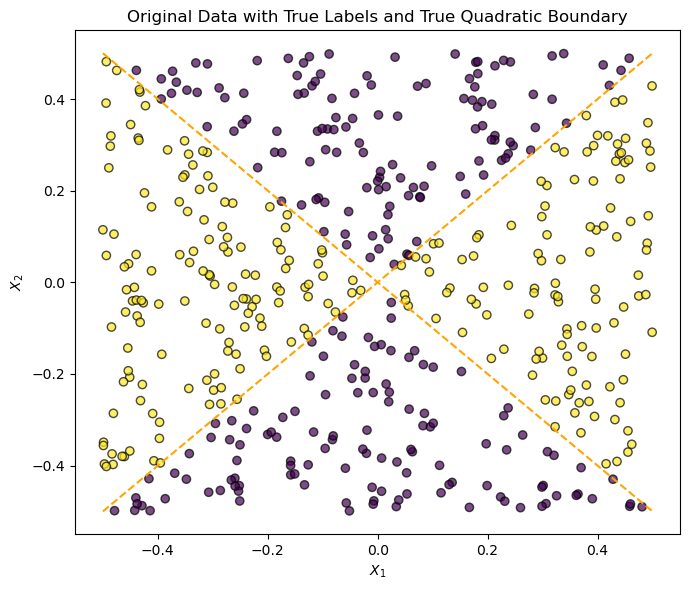

In [107]:
plot_data_with_boundary(X, y, title="Original Data with True Labels and True Quadratic Boundary")

__5 (c):__ We fit the logistic regression with the help of sklearn, then we plot
the corresponding decision boundary (which consists of a single line) together
with the original data points, colored according to their _true_ classes:

In [ ]:
log_reg_linear = LogisticRegression()
log_reg_linear.fit(X, y)

# Get predictions::
y_pred_linear = log_reg_linear.predict(X)
linear_accuracy = accuracy_score(y, y_pred_linear)
print(f"Training accuracy of linear logistic regression: {linear_accuracy}")

Training accuracy: 0.43


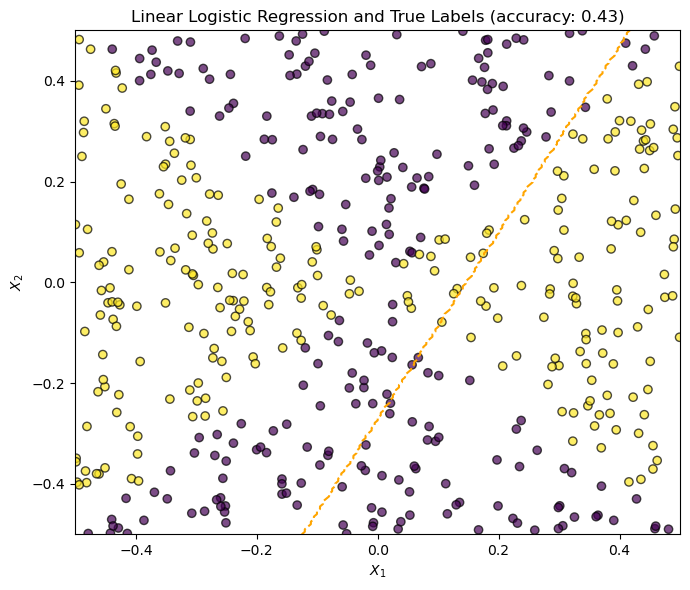

In [ ]:
plot_data_with_boundary(
    X, y, y_pred_linear, log_reg_linear, color_pred=False,
    title=f"Linear Logistic Regression and True Labels (accuracy: {linear_accuracy:.2f})"
)

As expected due to the non-linearity of the boundary, logistic regression performs
poorly and only achieves a training accuracy of $ 0.43 $.

__5 (d):__ We can solve this with the same line of code as above, but setting
`color_pred=True` instead to color the points according to their _predicted_
classes:

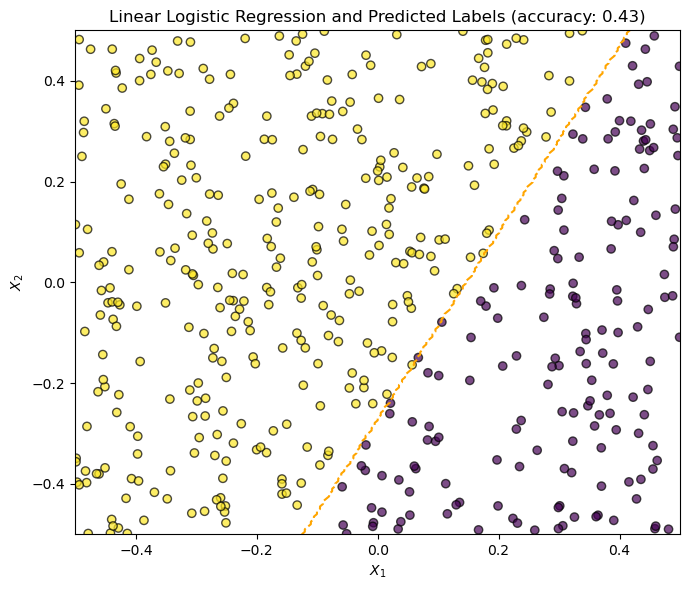

In [105]:
plot_data_with_boundary(
    X, y, y_pred_linear, log_reg_linear, color_pred=True,
    title="Linear Logistic Regression and Predicted Labels "
          f"(accuracy: {linear_accuracy:.2f})"
)

__5 (e):__ All we have to do is fit another logistic regression, but this time
incorporating quadratic transformations of the features; we will choose a maximum degree of $ 2 $.

In [46]:
# Generate polynomial features (includes x1^2, x2^2, x1*x2):
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

log_reg_quadratic = LogisticRegression()
log_reg_quadratic.fit(X_poly, y)

y_pred_quadratic = log_reg_quadratic.predict(X_poly)
quadratic_accuracy = accuracy_score(y, y_pred_quadratic)
print(f"Training accuracy of quadratic logistic regression: {quadratic_accuracy}")

Training accuracy of quadratic logistic regression: 0.958


This time the training accuracy is an impressive $ 96\% $. This is to be expected
since the true decision boundary is indeed quadratic, of the form $ X_1^2 - X_2^2 = 0 $.

Again, let's compare the decision boundary to the _true_ classes of the points in the training data:

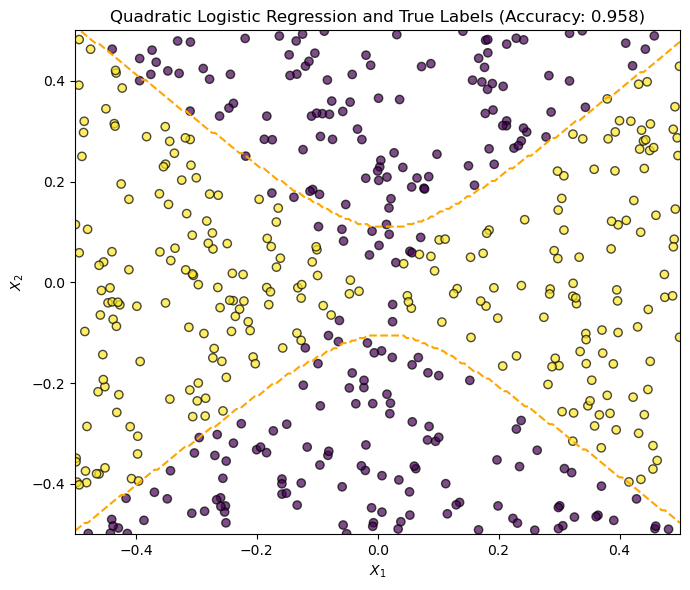

In [104]:
plot_data_with_boundary(
    X, y, y_pred_nonlinear, log_reg_nonlinear, poly, color_pred=False,
    title="Quadratic Logistic Regression and True Labels "
          f"(Accuracy: {nonlinear_accuracy:.3f})"
)

We see from the plot that the decision boundary fit by the model is a hyperbola,
while the true decision boundary is a pair of lines.

__5 (f):__ Again, we just need to modify the next-to-last argument in the preceding call
to `plot_data_with_boundary` from `False` to `True`:

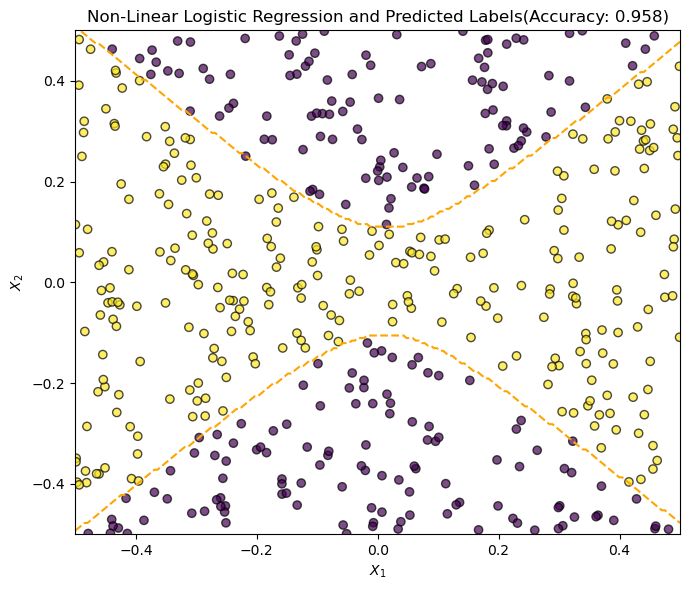

In [103]:
plot_data_with_boundary(
    X, y, y_pred_nonlinear, log_reg_nonlinear, poly, color_pred=True,
    title="Non-Linear Logistic Regression and Predicted "
         f"Labels(Accuracy: {nonlinear_accuracy:.3f})"
)

__5 (g):__ We use `SVC` to fit a support vector classifier. We obtain the following interest result:
* If we choose the regularization argument $ C $ to be $ 1 $, then no decision
  boundary is drawn because all points are classified to the same class.
* If we choose the regularization argument $ C $ to be $ 10 $, then the decision boundary is an
  almost vertical line.

In both cases, the accuracy is around $ 50\% $.
Here are the results for $ C = 1 $, where every point is classified to the $ y = 1 $ class:

In [97]:
svc_linear = SVC(kernel="linear", C=1)
svc_linear.fit(X, y)

y_pred_svc_linear = svc_linear.predict(X)
svc_linear_accuracy = accuracy_score(y, y_pred_svc_linear)

print(f"Training accuracy of linear svc: {svc_linear_accuracy}")

print(f"\nTrue class distributions:")
true_values, true_counts = np.unique(y, return_counts=True)
print(np.vstack((true_values, true_counts)))

print(f"\nPredicted class distributions:")
pred_values, pred_counts = np.unique(y_pred_svc_linear, return_counts=True)
print(np.vstack((pred_values, pred_counts)))


Training accuracy of linear svc: 0.506

True class distributions:
[[ -1   1]
 [247 253]]

Predicted class distributions:
[[  1]
 [500]]


And here are the results for $ C = 10 $, where the decision boundary is an
approximately vertical line:

In [98]:
svc_linear = SVC(kernel="linear", C=10)
svc_linear.fit(X, y)

y_pred_svc_linear = svc_linear.predict(X)
svc_linear_accuracy = accuracy_score(y, y_pred_svc_linear)

print(f"Training accuracy of linear svc: {svc_linear_accuracy}")

print(f"\nTrue class distributions:")
true_values, true_counts = np.unique(y, return_counts=True)
print(np.vstack((true_values, true_counts)))

print(f"\nPredicted class distributions:")
pred_values, pred_counts = np.unique(y_pred_svc_linear, return_counts=True)
print(np.vstack((pred_values, pred_counts)))


Training accuracy of linear svc: 0.512

True class distributions:
[[ -1   1]
 [247 253]]

Predicted class distributions:
[[ -1   1]
 [235 265]]


Let's plot the observations, colored by their _predicted_ labels as requested
in the statement, for the model with $ C = 10 $:

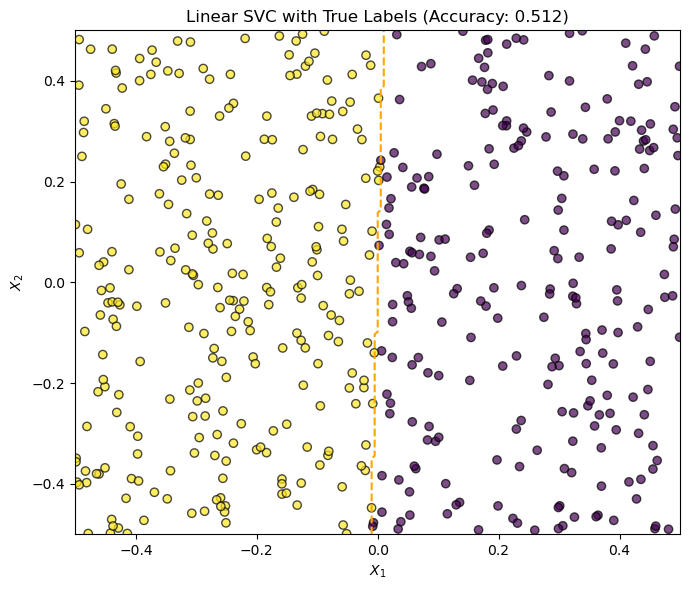

In [ ]:
plot_data_with_boundary(
    X, y, y_pred_svc_linear, svc_linear, color_pred=True,
    title=f"Linear SVC with True Labels (Accuracy: {svc_linear_accuracy:.3f})"
)

__5 (h):__ We again use `SVC` to fit the model, but use a radial kernel:

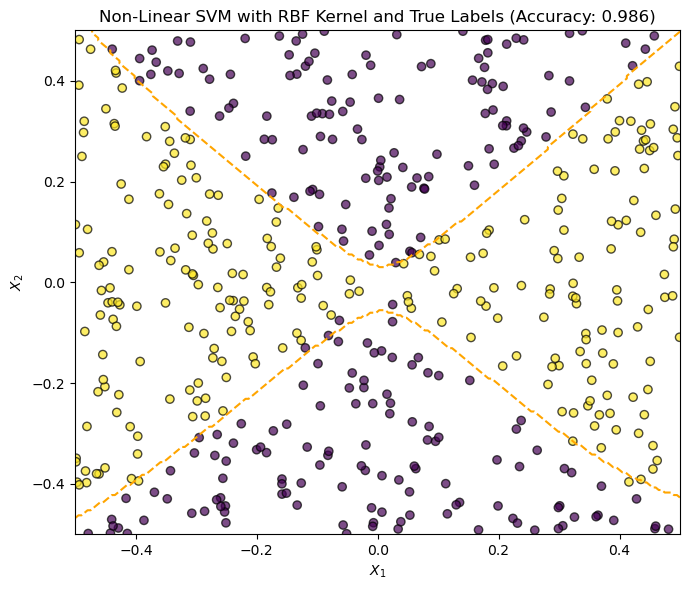

In [102]:
svm_nonlinear = SVC(kernel="rbf", gamma="scale")
svm_nonlinear.fit(X, y)

y_pred_svm_nonlinear = svm_nonlinear.predict(X)
svm_nonlinear_accuracy = accuracy_score(y, y_pred_svm_nonlinear)

plot_data_with_boundary(
    X, y, y_pred_svm_nonlinear, svm_nonlinear, color_pred=False,
    title="Non-Linear SVM with RBF Kernel and True Labels "
          f"(Accuracy: {svm_nonlinear_accuracy:.3f})"
)

The training accuracy of $ 98.6\% $ is even better than that obtained with the
quadratic logistic regression model. Now let's plot the observations with their
_predicted_ class labels:

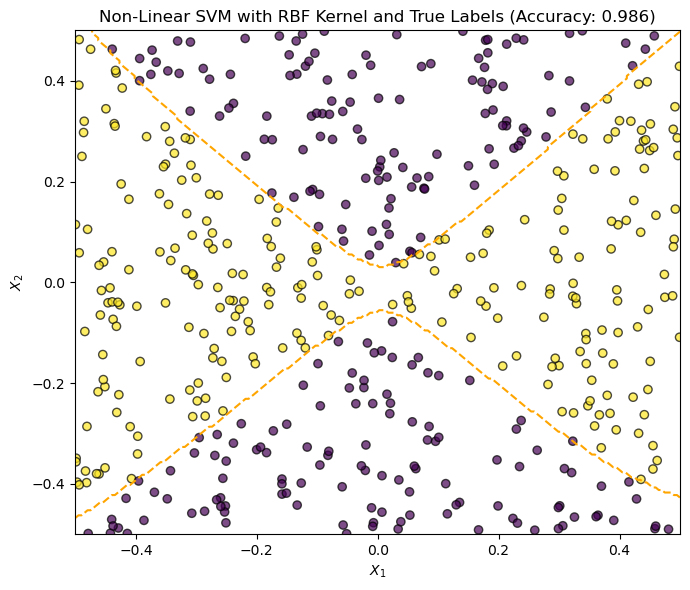

In [101]:
plot_data_with_boundary(
    X, y, y_pred_svm_nonlinear, svm_nonlinear, color_pred=True,
    title="Non-Linear SVM with RBF Kernel and True Labels "
          f"(Accuracy: {svm_nonlinear_accuracy:.3f})"
)

__5 (i):__ The results illustrate many of the important principles about model
complexity and decision boundaries made in the text:
* Both linear models attempt to separate the classes with a straight line, which
  is fundamentally incapable of capturing the quadratic boundary $ X_1^2 - X_2^2 = 0 $.
  This results in very poor accuracy and models that are no better than the null
  model assigning every observation to the same class.
* By adding polynomial features ($ X_1^2, X_2^2, X_1X_2 $), we transform the
  feature space to allow logistic regression to find a nonlinear boundary. The
  model can now directly learn the quadratic boundary, significantly improving
  accuracy to around $ 96\% $.
* Finally, the RBF kernel implicitly maps the data to a higher-dimensional space
  where a linear boundary can separate the classes. This allows the SVM to
  capture the quadratic nature of the true boundary without explicitly defining
  polynomial features. The accuracy is close to $ 99\% $.

In conclusion, the nonlinear models achieve near-perfect accuracy on this
dataset since they can precisely capture the quadratic decision boundary defined
by $ X_1^2 - X_2^2 = 0 $.